# Create Binary Mask from PNG

by _Tobias Reaper_

The goal of this notebook is to write a script that programmatically creates binary masks (white / black) from a PNGs files with transparent backgrounds.
These masks will be used to generate COCO-formatted datasets, which will in turn be used to train a Detectron2 object detection model.

Resources:

- [Image segmentation using color spaces in opencv + python](https://realpython.com/python-opencv-color-spaces/)
- [Object detection via color-based image segmentation using python](https://towardsdatascience.com/object-detection-via-color-based-image-segmentation-using-python-e9b7c72f0e11)

---

In [13]:
# === Imports === #
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

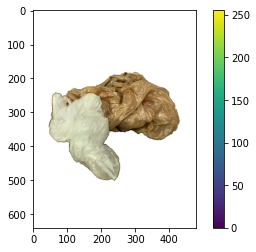

In [5]:
# === Load and view image === #
img1 = cv2.imread("test_images/001-clear.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.imshow(img1)
plt.colorbar()
plt.show()

In [6]:
# Use GrabCut to create mask
mask = np.zeros(img1.shape[:2], np.uint8)

# === Set up bg and fg models === #
bg_model = np.zeros((1, 65), np.float64)
fg_model = np.zeros((1, 65), np.float64)

# Define the rectangle with x, y, width, height
# In this case, the entire image
rect = (
    img1.shape[0] // 20,
    img1.shape[0] // 20,
    img1.shape[0] - 10,
    img1.shape[1] - 10
)

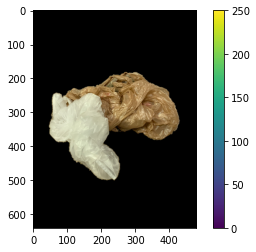

In [7]:
# === Make the cut and grab that ish!~ === #
cv2.grabCut(img1, mask, rect, bg_model, fg_model, 5, cv2.GC_INIT_WITH_RECT)
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img1_masked = img1 * mask[:, :, np.newaxis]

plt.imshow(img1_masked)
plt.colorbar()
plt.show()

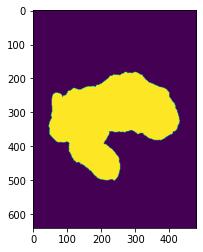

In [8]:
# === Take a look at the mask === #
plt.imshow(mask)
plt.show()

In [12]:
# === Save mask using matplotlib === #
plt.imsave("mask1.png", mask)

In [22]:
# === Write the above code into a function === #

def png_to_mask(path_to_img, filename):
    """Creates a binary mask from a transparent PNG."""

    # Load image
    img = cv2.imread(path_to_img)

    # Create blank mask of zeros
    mask = np.zeros(img.shape[:2], np.uint8)

    # Set up bg and fg models
    bg = np.zeros((1, 65), np.float64)
    fg = np.zeros((1, 65), np.float64)

    # Define the rectangle - hardcoded to use entire image
    rect = (
        img.shape[0] // 20,
        img.shape[0] // 20,
        img.shape[0] - 10,
        img.shape[1] - 10
    )

    # Make the cut and grabby grabby the mask
    cv2.grabCut(img, mask, rect, bg, fg, 5, cv2.GC_INIT_WITH_RECT)
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')

    # Save mask to file
    plt.imsave(filename, mask)

In [29]:
# === Test out the png_to_mask() function === #
test_img_old_path = "/Users/Tobias/workshop/buildbox/neurecycle/notebooks/test_images/metal_can_021.png"
test_img_new_path = "/Users/Tobias/workshop/buildbox/neurecycle/notebooks/test_images/metal_can_021_mask.png"

png_to_mask(test_img_old_path, test_img_new_path)

In [34]:
# === Walk manually to have more control over renaming/moving === #

# Dir with backgrounds; image
items_dir = "/Users/Tobias/workshop/buildbox/neurecycle/pycoco/items/train/items_train2019"
back = "/Users/Tobias/workshop/buildbox/neurecycle/pycoco/back"

# Dir without backgrounds; mask
ann_dir = "/Users/Tobias/workshop/buildbox/neurecycle/pycoco/items/train/annotations"
fore = "/Users/Tobias/workshop/buildbox/neurecycle/pycoco/fore"

# Ex filenames:
# annotation - 0087_metal_cans_0087.png
# image      - 0087.jpeg

id_counter = 0

# Loop through all class directories
for subdir in os.listdir(fore):
    os.chdir(fore)  # Move (back) to root
    os.chdir(subdir)  # Move to working dir
    print(os.getcwd())
    for f in os.listdir():
        id_counter += 1
        f_name, f_ext = os.path.splitext(f)

        # The subdir is the item_class_name
        item_class_name = subdir
        img_ann_id = str(id_counter).zfill(4)

        # Move (rename) back/subdir/f -> items/train/items_train2019/f_img_name
        f_img_name = f"{img_ann_id}{f_ext}"
        f_old_img_path = os.path.join(back, subdir, f)
        f_new_img_path = os.path.join(items_dir, f_img_name)
        os.rename(f_old_img_path, f_new_img_path)

        # Visual confirmation
        print(f"{f_old_img_path}")
        print(f"-> {f_new_img_path}")

        # Create mask and save to new location
        # fore/subdir/f -> items/train/annotations
        f_anno_name = f"{img_ann_id}_{item_class_name}_{img_ann_id}{f_ext}"
        f_old_anno_path = os.path.join(fore, subdir, f)
        f_new_anno_path = os.path.join(ann_dir, f_anno_name)
        png_to_mask(f_old_anno_path, f_new_anno_path)

        os.remove(f_old_anno_path)  # Remove the original foreground file

        # Visual confirmation
        print(f"{f_old_anno_path}")
        print(f"-> {f_new_anno_path}")

cle/pycoco/items/train/annotations/0418_plastic_container_food_0418.png
/Users/Tobias/workshop/buildbox/neurecycle/pycoco/back/plastic_container_food/063.png
-> /Users/Tobias/workshop/buildbox/neurecycle/pycoco/items/train/items_train2019/0419.png
/Users/Tobias/workshop/buildbox/neurecycle/pycoco/fore/plastic_container_food/063.png
-> /Users/Tobias/workshop/buildbox/neurecycle/pycoco/items/train/annotations/0419_plastic_container_food_0419.png
/Users/Tobias/workshop/buildbox/neurecycle/pycoco/back/plastic_container_food/077.png
-> /Users/Tobias/workshop/buildbox/neurecycle/pycoco/items/train/items_train2019/0420.png
/Users/Tobias/workshop/buildbox/neurecycle/pycoco/fore/plastic_container_food/077.png
-> /Users/Tobias/workshop/buildbox/neurecycle/pycoco/items/train/annotations/0420_plastic_container_food_0420.png
/Users/Tobias/workshop/buildbox/neurecycle/pycoco/back/plastic_container_food/073.png
-> /Users/Tobias/workshop/buildbox/neurecycle/pycoco/items/train/items_train2019/0421.png
